# **stellar classification dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data_path = "/content/StarClassificationDataset.csv"  # Replace with the correct path
data = pd.read_csv(data_path)

<ipython-input-2-ee38790827d5>:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [ ]:
# Explore the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nSample Data:\n", data.head())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (100000, 18)

Column Names:
 Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter',
       'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD',
       'fiber_ID', 'class'],
      dtype='object')

Sample Data:
       object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   

   near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
0        19.16573   18.79371   3606       301        2        79   
1        21.16812   21.61427   4518       301        5 

In [ ]:
# Drop unnecessary columns
columns_to_drop = ["object_ID", "spec_obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "plate_ID", "MJD", "fiber_ID"]
data = data.drop(columns=columns_to_drop)

In [ ]:
# Encode the target variable
print("\nClass Distribution:\n", data["class"].value_counts())
data["class"] = data["class"].astype("category").cat.codes

# Define features and target
X = data.drop("class", axis=1)
y = data["class"]



Class Distribution:
 class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


In [ ]:
# Replace blank spaces or empty strings with NaN
data = data.replace(r'^\s*$', np.nan, regex=True)

# Check for missing values again
print("Missing Values After Cleaning:\n", data.isnull().sum())

# Drop rows with missing values (or you can impute them if preferred)
data = data.dropna()

# Verify all columns are numeric
print("\nData Types:\n", data.dtypes)

# Ensure all features are numeric
X = data.drop("class", axis=1)
y = data["class"]

# Convert all columns in X to numeric (if any issues remain)
X = X.apply(pd.to_numeric, errors='coerce')

# Check for NaNs in features after conversion
if X.isnull().any().any():
    print("\nWarning: NaNs detected in features after conversion. Dropping NaNs.")
    X = X.dropna()

# Perform the stratified split and model training again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



Missing Values After Cleaning:
 alpha             2
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
red_shift         0
class             0
dtype: int64

Data Types:
 alpha              object
delta             float64
UV_filter         float64
green_filter      float64
red_filter        float64
near_IR_filter    float64
IR_filter         float64
red_shift         float64
class                int8
dtype: object


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, target_names=["Galaxy", "Quasar", "Star"])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      Galaxy       0.98      0.98      0.98     17833
      Quasar       0.96      0.93      0.95      5688
        Star       0.99      1.00      1.00      6478

    accuracy                           0.98     29999
   macro avg       0.98      0.97      0.97     29999
weighted avg       0.98      0.98      0.98     29999



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[17560,   220,    53],
       [  374,  5313,     1],
       [    1,     0,  6477]])

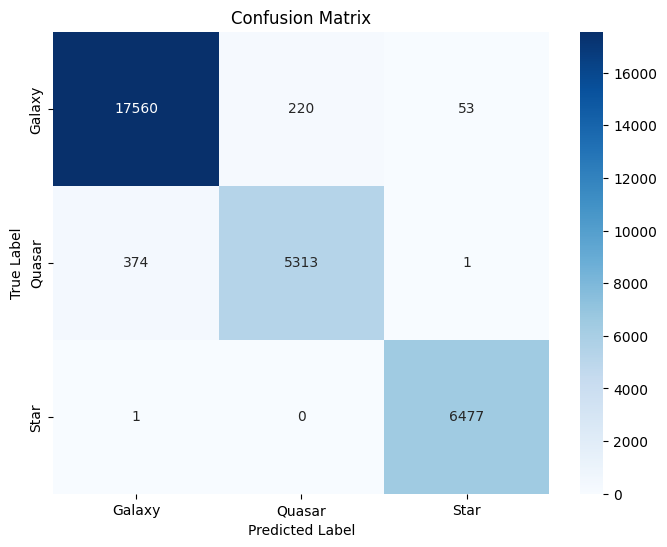

In [ ]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Galaxy", "Quasar", "Star"], yticklabels=["Galaxy", "Quasar", "Star"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Classification Report**:
1. **Galaxy**:
   - Precision (0.98): The model has very few false positives for galaxies, meaning predictions of "Galaxy" are reliable.
   - Recall (0.98): Almost all true galaxies are correctly identified, indicating strong coverage.
   - **Impact**: The balanced precision and recall show that the model effectively distinguishes galaxies from other classes, with minimal confusion.

2. **Quasar**:
   - Precision (0.96): Some samples predicted as "Quasar" are incorrect, indicating slight overlap with other classes.
   - Recall (0.93): The lower recall compared to precision shows that some quasars are misclassified, primarily as galaxies.
   - **Effect**: Misclassifying quasars might be due to overlapping features with galaxies, which could affect scientific analyses reliant on precise quasar identification.

3. **Star**:
   - Precision, Recall, F1-Score (~1.00): Stars are classified with near-perfect accuracy, showing a clear distinction from other classes.
   - **Influence**: This robustness in identifying stars ensures reliable data for studies involving stellar properties.

4. **Overall Accuracy (0.98)**:
   - **Relation**: High accuracy indicates the model generalizes well, but slight imbalances in recall (macro avg 0.97) suggest room for improvement in detecting less prominent classes like quasars.

---

#### **Confusion Matrix**:
1. **Galaxy Misclassifications**:
   - 220 misclassified as Quasar and 53 as Star.
   - **Effect**: The confusion with quasars highlights feature similarity (e.g., redshift or filters), possibly requiring enhanced feature engineering.

2. **Quasar Misclassifications**:
   - 374 misclassified as Galaxy and 1 as Star.
   - **Impact**: The higher confusion with galaxies suggests quasars share more attributes with galaxies, leading to difficulty in separation.

3. **Star Misclassifications**:
   - Only 1 misclassified (as Galaxy or Quasar).
   - **Influence**: Stars' unique characteristics ensure they are easily distinguishable, enhancing confidence in star-related predictions.

4. **Overall Matrix Observations**:
   - **Relation Between Classes**: Most misclassifications involve quasars and galaxies, which could stem from overlapping spectral features.
   - **Impact on Dataset Balance**: The relatively small number of quasars amplifies the effect of misclassifications, skewing recall.

---

#### **Conclusions**:
- The model performs exceptionally for stars and galaxies, with quasars showing moderate confusion.
- Misclassifications highlight the need for better separation of overlapping features, particularly between galaxies and quasars.
- This performance ensures reliability for applications involving stars but suggests careful handling of quasars for high-precision studies.

# **california housing prices**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing


In [ ]:
# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target


In [ ]:
# Apply Sturge's Rule to calculate the number of bins (k)
n = len(y)
k = int(np.ceil(np.log2(n) + 1))

# Stratified split (we need to discretize the target variable 'y' into bins)
bins = np.linspace(np.min(y), np.max(y), k)
y_binned = np.digitize(y, bins)

# Perform the stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y_binned, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Train Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
# Predict with Ridge Model
ridge_pred = ridge_model.predict(X_test)

# Predict with Lasso Model
lasso_pred = lasso_model.predict(X_test)

# Calculate MAE, MSE, and RMSE for Ridge Model
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

# Calculate MAE, MSE, and RMSE for Lasso Model
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

# Print the results
print("Ridge Regression Results:")
print(f"MAE: {ridge_mae:.2f}")
print(f"MSE: {ridge_mse:.2f}")
print(f"RMSE: {ridge_rmse:.2f}\n")

print("Lasso Regression Results:")
print(f"MAE: {lasso_mae:.2f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")


Ridge Regression Results:
MAE: 0.53
MSE: 0.54
RMSE: 0.73

Lasso Regression Results:
MAE: 0.62
MSE: 0.69
RMSE: 0.83


#### **Ridge Regression Results:**
- **MAE: 0.53**: The average absolute error is relatively low, indicating that on average, the model's predictions are off by about 0.53 units.
- **MSE: 0.54**: The mean squared error is slightly higher, suggesting that there are some larger errors, but they are not extremely significant.
- **RMSE: 0.73**: The root mean squared error shows that, on average, the model's predictions deviate by about 0.73 units, which is somewhat higher than the MAE due to the squaring of errors in MSE.

#### **Lasso Regression Results:**
- **MAE: 0.62**: The Lasso model has a higher MAE compared to Ridge, indicating that its predictions are, on average, less accurate.
- **MSE: 0.69**: Lasso has a higher MSE as well, meaning that it suffers from slightly larger errors than Ridge.
- **RMSE: 0.83**: The RMSE for Lasso is also higher than Ridge, which suggests that the Lasso model has more significant errors overall.

#### **Findings:**
1. **Ridge Regression** outperforms **Lasso Regression** in terms of all three metrics (MAE, MSE, and RMSE). This suggests that Ridge is better at capturing the underlying patterns in the data and is less prone to overfitting compared to Lasso in this case.
   
2. **Lasso Regression**, despite being a great model for feature selection (which forces some coefficients to zero), seems to be less accurate here. It could be because the dataset doesn’t have enough irrelevant features that would benefit from Lasso’s feature selection mechanism.
______________________________________________________________________________

#### **Possible Next Steps:**
- **Tuning Hyperparameters**: Both Ridge and Lasso models have hyperparameters (like `alpha`) that could be fine-tuned to improve performance.
- **Model Selection**: Based on this initial evaluation, Ridge seems to be the better choice for this dataset, but you could experiment with other models such as ElasticNet (which combines Ridge and Lasso) or decision-tree-based models (like RandomForest or XGBoost) to see if they offer improved performance.
- **Cross-Validation**: To further assess the robustness of these models, you could use cross-validation, which helps in obtaining more reliable performance estimates.
